In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv("housepred.csv")
data

,Unnamed: 0,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,0,Super built-up Area,19-Dec,Electronic City Phase II,2 bhk,Coomee,1056,2.0,1.0,39.07
1,1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600sqft,5.0,3.0,120
2,2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62
3,3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95
4,4,Super built-up Area,Ready To Move,Kothanur,2 bhk,NaN,1200,2.0,1.0,51
...,...,...,...,...,...,...,...,...,...,...
13315,13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231
13316,13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,NaN,3600sqft,5.0,NaN,400
13317,13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 bhk,Mahla T,1141,2.0,1.0,60
13318,13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689,4.0,1.0,488


In [3]:
data.drop(columns="Unnamed: 0",inplace = True)

In [4]:
data

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 bhk,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600sqft,5.0,3.0,120
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95
4,Super built-up Area,Ready To Move,Kothanur,2 bhk,NaN,1200,2.0,1.0,51
...,...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,NaN,3600sqft,5.0,NaN,400
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 bhk,Mahla T,1141,2.0,1.0,60
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689,4.0,1.0,488


we will check the percentage of nan values present in each feature

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  object 
dtypes: float64(2), object(7)
memory usage: 936.7+ KB


In [6]:
features_with_na=[features for features in data.columns if data[features].isnull().sum()>1]
for feature in features_with_na:
    print(feature, np.round(data[feature].isnull().mean(), 4),  ' % missing values')

size 0.0012  % missing values
society 0.4131  % missing values
bath 0.0055  % missing values
balcony 0.0457  % missing values


In [7]:
data["location"].mode()

0    Whitefield
dtype: object

In [8]:
s = data.fillna({"location":"not available","bath":1,"balcony":0,"size":"1 BHK","society":"not available"},inplace=True)
data.isnull().sum()

area_type       0
availability    0
location        0
size            0
society         0
total_sqft      0
bath            0
balcony         0
price           0
dtype: int64

In [9]:
data.head(15)

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 bhk,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600sqft,5.0,3.0,120
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,not available,1440,2.0,3.0,62
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95
4,Super built-up Area,Ready To Move,Kothanur,2 bhk,not available,1200,2.0,1.0,51
5,Super built-up Area,Ready To Move,Whitefield,2 bhk,DuenaTa,1170,2.0,1.0,38
6,Super built-up Area,18-May,Old Airport Road,4 BHK,Jaades,2732,4.0,0.0,204
7,Super built-up Area,Ready To Move,Rajaji Nagar,4 BHK,Brway G,3300,4.0,0.0,600sqft
8,Super built-up Area,Ready To Move,Marathahalli,3 BHK,not available,1310,3.0,1.0,63.25
9,Plot Area,Ready To Move,Gandhi Bazar,6 Bedroom,not available,1020,6.0,0.0,370


In [10]:
for i in range(len(data["availability"])):
        if data["availability"][i]== "Ready To Move":
            print(data["price"][i])
            print(data["location"][i])
            print(data["society"][i])
            print()

120
Chikka Tirupathi
Theanmp

62
Uttarahalli
not available

95
Lingadheeranahalli
Soiewre

51
Kothanur
not available

38
Whitefield
DuenaTa

600sqft
Rajaji Nagar
Brway G

63.25
Marathahalli
not available

370
Gandhi Bazar
not available

295
Whitefield
Prrry M

38
7th Phase JP Nagar
Shncyes

40
Gottigere
not available

148
Sarjapur
Skityer

73.5
Mysore Road
PrntaEn

48
Bisuvanahalli
Prityel

60
Raja Rajeshwari Nagar
GrrvaGr

290
Ramakrishnappa Layout
PeBayle

48
Manayata Tech Park
not available

15
Kengeri
not available

380
Thanisandra
Soitya 

103
Bellandur
not available

23.1
Electronic City
Itelaa 

47
Electronic City
KBityo 

35
Bisuvanahalli
Prityel

123
Hebbal
Mahosya

57.39
Raja Rajeshwari Nagar
GrrvaGr

125
Kasturi Nagar
Kantsce

45.5
Electronics City Phase 1
not available

125
Kundalahalli
Dieldli

56.12
Chikkalasandra
not available

45
Uttarahalli
not available

81
Murugeshpalya
Gentson

38
Ganga Nagar
Ceove G

48
Yelahanka
not available

200
HSR Layout
not available

33
Dodd

400
7th Phase JP Nagar
not available

99
Bank Avenue
not available

49
Chikkalasandra
not available

60
Hebbal Kempapura
Vrensn 

120
Surabhi Layout
VDdonel

337
Old Madras Road
Brica E

58
Banjara Layout
not available

52.5
5th Phase JP Nagar
Prenty 

53
Omkar Nagar
Shinei 

45
Yelahanka
Apows M

32
Kereguddadahalli
not available

36
Bisuvanahalli
Prityel

48.5
Whitefield
SVineun

95
Lingadheeranahalli
Soiewre

58
Silk Board
not available

26
Shampura
not available

38
Vidyaranyapura
not available

40
Kada Agrahara
not available

35
JP Nagar
DSvvyx 

165
BHEL Layout
not available

41
Medahalli
not available

67
Vittasandra
Prlla C

90
8th Phase JP Nagar
not available

145
Banashankari Stage III
not available

80
Kashi Nagar
not available

65
Begur Road
not available

275
Sector 7 HSR Layout
not available

48
Hosur Road
not available

110
VHBCS Layout
OlarkLa

70
Whitefield
SuMTBPr

42.74
KR Puram
Jahidva

85
Ittamadu
not available

120
Thanisandra
not available

160
Rajiv Nagar
PuoodS


75
Frazer Town
Maentr 

105
Kundalahalli
Dieldli

170
Yeshwanthpur
Saade E

45
Kambipura
Prrtht 

38
Kaggalipura
Baowsig

62.5
Yelahanka
Neite T

42
Kanakpura Road
Shiew T

170
Manayata Tech Park
not available

65
Kullappa Colony
not available

120
Akshaya Nagar
DLhtsnd

67
Rachenahalli
not available

98
Williams Town
not available

350
Jaya Nagar East
Maens G

175
Ambalipura
SJarkte

27
Sarjapur  Road
Shthi S

30.5
Iggalur
VaoldMa

48
Sompura
Suiseit

244
Harlur
not available

300
Sarjapur  Road
Adeatlm

74
Bellandur
not available

35
Cooke Town
not available

42
Varthur
DSingSt

62
Electronic City
Suashen

40
Whitefield
SSthamh

75
Banashankari
Skave E

43
Doddakallasandra
not available

28
Chokkanahalli
not available

65
Kaggalipura
Baowsig

97.42
Battarahalli
PaontWa

45
Uttarahalli
Shierhi

79
Thanisandra
Bhmesy 

46.17
Yelenahalli
not available

85
Kudlu Gate
Srier P

100
Chikkaballapur
not available

120
Chamrajpet
SihtsHe

60.47
Uttarahalli
not available

53.76
Raja Rajeshwari

88
Kogilu
not available

100
Koramangala
not available

110
Yelahanka
not available

120
Lakshmi Layout
Cemesti

72
Tavarekere
not available

33
Bisuvanahalli
Prityel

120
Yelahanka
Niareum

68
Immadihalli
not available

55
Srinivasa Nagar
not available

54
Jigani
DLhtsen

500
Kengeri
not available

62
KPC Layout
SVmesVi

40
Yelahanka
not available

360
JP Nagar
not available

110
Sarjapur
not available

200
Ardendale
AWharde

56
HOSUR MAIN ROAD
not available

215
Hebbal
Prersis

130
Begur
not available

310
Sarjapur  Road
Vaunei 

37.5
Electronic City
SNncypa

250
Nandi Durga Road
not available

125
Rajiv Nagar
PuoodSk

390
Cooke Town
not available

350
Kumara Park
not available

80
Daadys Gaarden Layout
InockHo

19.5
Bommanahalli
Prtusth

212
Marathahalli
PueraRi

68
Munnekollal
Keids O

48
Sahakara Nagar
KVersuj

228.5
Sarjapur  Road
DSndsod

37.1
Hosa Road
Sancei 

60
Kothannur
Esale O

80
Chikkabanavar
not available

75
Ramamurthy Nagar
not available

53
Shampura
not available

75

Dhalsh 

42.99
7th Phase JP Nagar
SrncyRe

492
Rajaji Nagar
PhestOn

338
BTM Layout
not available

46
Gaundanapalya
Sioma A

137
Arasanakunte
not available

65
Kasturi Nagar
not available

76
Laxmi Sagar Layout
DubowRa

110
Sarjapur  Road
Adeatlm

42
Kengeri Satellite Town
not available

168
Bellandur
SoderLa

110
Ulsoor
not available

84
Outer Ring Road East
not available

520
5th block Koramangala
not available

34.5
Nelamangala
not available

75
JakkurYelahanka
not available

55.5
Yemlur
not available

55.5
Kaggadasapura
Foity S

47.405
KR Puram
Jahidva

34
Electronic City
PrwarSa

49.27
Kundalahalli
Rasom B

66.5
TC Palaya
not available

75
Lakshminarayana Pura
RothaVa

86
Anjanapura
not available

24
Kammasandra
Prarkhi

85
Bellandur
not available

89
Banashankari Stage VI
not available

320
Malleshwaram
Sariaat

510
Ngef Layout
not available

110
Bileshivale
not available

55
2nd Phase JP Nagar
Gintsar

80
Ramamurthy Nagar
not available

125
Manjunatha Layout
not available

50
Ka

56
Sarjapur  Road
not available

160
Rustam Bagh Layout
Jants V

55
Vasantha Vallabha Nagar
not available

75
Vyalikaval
not available

40.5
KR Puram
Hivesdr

69
Harlur
not available

82
Bellandur
OriewLa

52.5
Rachenahalli
Sovar S

40
Pai Layout
not available

67.4
Vittasandra
not available

115
Sarjapur Road, 
not available

60
Hennur
not available

65
Margondanahalli
not available

214
Banaswadi, 
not available

170
BTM 2nd Stage
SNe 2ev

37
Sompura
Suiseit

80
Malleshwaram
SaeneSe

250
Giri Nagar
Bancyri

55
8th Phase JP Nagar
i1rtsCo

40
Chinnapanahalli
Mae 2ow

73.5
Rachenahalli
Sovar S

420
Anand Nagar
not available

80
Akshaya Nagar
DLhtsnd

68
Thanisandra
Bhmesy 

45.2
Kanakapura
not available

75
Sarjapur  Road
Trurea 

80
Kadugodi
not available

33
Balaji Gardens Layout
GSnts A

108
Thavarekere
not available

125
Jalahalli
Tahtsla

75
KR Puram
not available

100
Budigere
PrityTr

50
TC Palaya
not available

115
Gubbalala
MauilTr

68
Begur Road
not available

70
 Devarabeesan


60
Nagarbhavi
SVdhaig

65
Ananth Nagar
not available

90
Basaveshwara Nagar
Niine J

70
Bharathi Nagar
FoapeWa

300
Sector 7 HSR Layout
not available

60
Amruthahalli
not available

50
Bhuvaneshwari Nagar
not available

75
Panathur
Saite G

285
Pulikeshi Nagar
not available

53
Hoodi
Adion M

73
B Narayanapura
Niidet 

52.8
Garudachar Palya
not available

385
Sarjapur  Road
Maana E

46
Babusapalaya
not available

125.5
Yelahanka
Niareum

325
Doddaballapur
not available

75
Anand Nagar
not available

60
Kaggalipura
Baowsig

50
Kaval Byrasandra
not available

115
Thanisandra
Soitya 

210
Whitefield
T ZedZe

83
Banashankari
Naashi 

66.4
Kanakpura Road
Wiowsri

65
Gottigere
Srtusi 

58
Babusapalaya
not available

150
Vijaya Bank Layout
not available

21
Hosur Road
SLiewce

90
Narayanappa Layout
not available

55.9
Whitefield
Iseenst

490
1Hanuman Nagar
not available

78
Sarjapur
Inensba

35
Raghuvanahalli
Srncykh

140
Hegde Nagar
SoitaCa

65
AECS Layout
CMoryma

220
Iblur Village
Emine P

78
Sarjapur  Road
not available

110
KR Puram
not available

78
Banashankari
not available

82
JP Nagar 8th Phase, 
not available

35
Kachanayakanahalli
ICoolon

95
Bannerghatta Road
SNity S

62.8
Nagaraja Garden
not available

80
Tejaswini Nagar
Naods W

90
Ashwath Nagar
Raeusiy

150
1 Annasandrapalya
not available

49
Hebbal
not available

44
Gunjur
Puide P

600sqft
Domlur
not available

60
Yelenahalli
Jaers S

79
Harlur
Prncyrn

226
Jigani
Prllasw

400
6th block Koramangala
Sinde G

500
4th Block Koramangala
not available

330
Whitefield
not available

140
Marathahalli
Prionad

33.5
Doddathoguru
Vayali 

39
Nagadevanahalli
not available

80.99
Kathriguppe
Prone M

59
Kothanur
not available

135
Domlur
not available

175
Hebbal
not available

87
Tindlu
Hentye 

97
Yelahanka
PuziaVe

334
Rajaji Nagar
PhestOn

110
KSRTC Layout
not available

49.02
KR Puram
LVniaar

165
Keshava Nagar
ETens G

760
Dollars Layout
not available

15
Electronic City
Itelaa 

39
Whitefield
SSthamh

100
Banash

62
Akshaya Nagar
not available

280
Whitefield
not available

46
Haralur Road
not available

200
Old Town
not available

68
Vijaya Bank Layout
not available

120
Okalipura
not available

55
Sector 2 HSR Layout
NDpalSe

50
Sahakara Nagar
KPhtsei

115
Thanisandra
Soitya 

90
Whitefield
Viisear

140
Hebbal Kempapura
Goateds

100
Harlur
not available

70
Somasundara Palya
ManceEl

260
Yeshwanthpur
not available

49
Kaval Byrasandra
not available

180
Maruthi Extension
not available

98
Vidyapeeta
not available

35
Pai Layout
not available

123
Hebbal
Mahosya

63.98
Banashankari
not available

140
Madiwala
not available

78
Haralur Road
Ozensve

90
7th Phase JP Nagar
BriumMi

125
EPIP Zone
Ste 2al

60
Akshaya Nagar
not available

55
Rachenahalli
Paentta

48
Horamavu Banaswadi
not available

41
Kereguddadahalli
Jaood G

92
Varthur
not available

70
Yelahanka
not available

220
Rachenahalli
not available

35
BTM 2nd Stage
Fea 3Al

155
Ramagondanahalli
not available

198
Ambalipura
AltesEs

15

41
Ramamurthy Nagar
ItRRVna

58
Nyanappana Halli
Salms G

43
Bisuvanahalli
Prityel

115
Srirampuram
not available

52.36
Gubbalala
Names H

115
Sector 7 HSR Layout
Saitya 

49
HBR Layout
Feissx 

95
Ramagondanahalli
SVodsve

45.5
Kothanur
not available

40
Hosa Road
not available

68
Bellandur
Srthaa 

775
Koramangala
not available

165
Domlur
Saiewas

115
Doddakallasandra
not available

58
Electronic City
PaanaCh

60
1st Block Jayanagar
not available

510
Banashankari Stage II
not available

90
Bommanahalli
AxinoCi

75
Harlur
Prncyrn

45
Sultan Palaya
not available

38.33
Raja Rajeshwari Nagar
not available

42
Kengeri Hobli
not available

47.24
Uttarahalli
not available

55
Kaggadasapura
WishiVa

110
Shivaji Nagar
not available

97
Sarjapur Road, 
not available

200
7th Phase JP Nagar
not available

110
5th Phase JP Nagar
not available

35
NRI Layout
not available

104
Thigalarapalya
Prtanha

225
8th Phase JP Nagar
not available

19.4
Anekal
not available

35.03
Electronic City
Prons

not available

95
BTM 1st Stage
Coise P

49
Jigani
DLhtsan

250
HRBR Layout
not available

49.9
JP Nagar
not available

324
Indira Nagar
not available

53.49
Whitefield
Iseenst

120
Moodalapalya
not available

82
Panathur
Prcesvy

160
 Devarachikkanahalli
not available

180
Frazer Town
CaaveEn

95
Nelamangala
V2gesre

139
Thigalarapalya
Prtanha

32
Pattandur Agrahara
Shvarji

68
Nayandanahalli
Rarelt 

200
Sahakara Nagar
EsniaGa

160
Thigalarapalya
Prtanha

260
Bannerghatta Road
not available

90
Gokaula Extension
not available

55
Subash Nagar
not available

58.27
Poorna Pragna Layout
not available

49.81
Kudlu Gate
not available

57
Ramamurthy Nagar
SVoutow

75
Vishveshwarya Layout
not available

35
Pattanagere
not available

68
ISRO Layout
Shhin S

86
Banashankari
Bregae 

76.45
Kathriguppe
not available

325
Marathahalli
not available

33
Electronic City
Cearuy 

50
Gottigere
Apentir

42
Old Madras Road
not available

69
Bannerghatta Road
SNity S

55
Mahadevpura
3Codeli

42
7th Pha

78.3
Kathriguppe
Prone M

65
Bannerghatta Road
Shissut

78
Thanisandra
not available

60
Chelekare
not available

75
Ramamurthy Nagar
not available

120
4th T block Jayanagar
not available

125
R.T. Nagar
SiineSu

46
Haralur Road
RInceeg

160
Raja Rajeshwari Nagar
not available

56
Sarjapur  Road
Arldsyo

40.39
Doddakallasandra
not available

94
Tumkur Road
Sahtsva

68
Kanakpura Road
not available

211
Chamrajpet
not available

125
7th Phase JP Nagar
Eladero

62
Doddathoguru
Prora F

95
Kanakpura Road
Niacesa

288
Frazer Town
Prook M

133
Hennur Road
SaireSa

175
BTM 2nd Stage
not available

245
Hosakerehalli
Taonte 

200
CR Layout
not available

105
Kaikondrahalli
not available

73
Bommanahalli
not available

60
Yelahanka
Rarthne

92
Vishveshwarya Layout
not available

49.8
Electronics City Phase 1
not available

55
Banashankari Stage II
not available

598
Rajaji Nagar
PhestOn

47
Gottigere
Apentir

55
BTM 4th Stage
not available

23
Jalahalli West
Prntsax

48.48
Uttarahalli
Shony S



Frazer Town
Meentan

525
Whitefield
Chllea 

48.53
Thigalarapalya
Saowsi 

37
Horamavu Agara
not available

91
Kundalahalli
Dieldli

80
Basaveshwara Nagar
not available

75
Akshaya Nagar
DLhtsnd

85
Sarjapur  Road
CoLeoen

59
Tejaswini Nagar
Dhndsh 

82
Kasavanhalli
not available

138
BTM Layout 1stage 9th Main
not available

68
Seegehalli
Srandir

26
Electronic City Phase II
Rie 2ri

120
Jeevan bima nagar
Lancysi

145
OMBR Layout
not available

60
B Narayanapura
Inentva

150
Banaswadi
not available

50
Uttarahalli
not available

75
Sanjay nagar
not available

80
Thubarahalli
ShdhiSa

58
Haralur Road
Siows M

110
Hoskote
not available

16
Basava Nagar
SLionan

45
Yelahanka
Apows M

69
Somasundara Palya
not available

75
Bannerghatta Road
not available

65
Volagerekallahalli
AszarAl

82
Sarjapur  Road
CoLeoen

62.38
Kanakapura
not available

42
Haralur Road
RInceeg

65
Lavakusha Nagar
Vanusn 

114
Lingadheeranahalli
Soiewre

69.75
Sarjapur  Road
SJityaz

45
Kodichikkanahalli
not availab


360
Magadi Road
not available

70
Uttarahalli
Revane 

60
Silk Board
not available

100
Mathikere
not available

39
Thanisandra
SLaceda

120
Jakkur Plantation
Reicace

65
Mallasandra
GMilse 

67
Hoodi
Macanr 

62
Doddakammanahalli
not available

52
Bellandur
SRageri

53.5
Thanisandra
NRtesnd

625
Whitefield
Toindls

50
Veersandra
Shnto F

171
Munivenkatppa Layout
SNiew L

85
Bommanahalli
Alarke 

23.5
5th Phase JP Nagar
not available

42.59
Uttarahalli
not available

65
Lakshmipura
not available

16
Harsha Layout
not available

52
Padmanabhanagar
Gancy P

56
Sarjapur
Sondaka

75
Tata Nagar
not available

71
Bannerghatta Road
not available

75
Hulimavu
not available

75
Kaggadasapura
not available

102
Sathya Layout
NChtsun

49.8
New Thippasandra
not available

175
Hennur Road
Samittv

37
Sarjapura - Attibele Road
not available

45
Vijayanagar
not available

139
Vidyaranyapura
not available

38
Hoskote
Sohti S

100
Hebbal
Prersis

145
Chennammana Kere
not available

550
Devanahalli
Soy

Srirampuram
not available

35.285
Thanisandra
Gontsoo

36.8
Sarjapur  Road
Shthi S

85
Whitefield
Agtiaur

42
Kudlu
Srrnasa

35.22
Whitefield
SMuilan

40.08
Uttarahalli
DSera S

89.04
Narayanapura
AriosHe

65
Kalyan nagar
not available

170
2nd Phase JP Nagar
not available

80
KR Puram
not available

53.87
Raja Rajeshwari Nagar
GrrvaGr

84
Akshaya Nagar
DLhtsnd

30
Doddathoguru
Vabow R

70
Jakkuru Layout
Vithm R

200
Nagawara Junction
not available

48.95
Mysore Road
not available

56
Thanisandra
Bhmesy 

270
7th Phase JP Nagar
not available

90
Hoysalanagar
not available

82.89
Battarahalli
PaontWa

80
Chikkabanavar
not available

41
Abbaiah Reddy Layout
not available

180
Tavarekere
not available

92
Budigere
PrityTr

251
Nagavara
Vancyat

67
1st Block HRBR Layout
not available

90
Whitefield
Nillsre

142
Sarjapur  Road
Cetattu

275
Indira Nagar
not available

80
Naganathapura
not available

90
Tavarekere
not available

171
Indira Nagar
Suurtni

150
JP Nagar
Arentra

26
KG Halli
not 

not available

350
Yelahanka New Town
not available

47.65
Uttarahalli
Aklia R

175
Old Madras Road
Saive L

38.37
Raja Rajeshwari Nagar
GrrvaGr

60
Arekere
Nihtsss

411
Outer Ring Road East
PrstaTe

115
Ramagondanahalli
DNeremo

56
Sarjapur  Road
not available

48
Kaggadasapura
VSomepi

54
Akshaya Nagar
Javasi 

55
Mallathahalli
not available

240
Rajaji Nagar
Brway G

175
Richmond Town
not available

90
Sarjapur  Road
PuineSu

400
Whitefield
VDarmlo

70
Rayasandra
MJeusyl

93
Kadubeesanahalli
Krshi G

260
Iblur Village
Emine P

95
Kasavanhalli
Salisal

100
Yeshwanthpur
not available

55
Whitefield
Gamesti

90
Whitefield
Brony H

65
Telecom Layout
not available

67
Banashankari
Goeesem

120
7th Phase JP Nagar
Eladero

208
Whitefield
StodsWa

52.5
Rachenahalli
not available

27.375
Budigere
PrityTr

750
Sarjapur  Road
Adeatlm

39
Devanahalli
not available

48
Hoodi
Macanr 

15
Alur
not available

30
Nelamangala
not available

792
Richmond Town
not available

52
Hebbal
Srntsha

59
Hulim

63.51
Electronics City Phase 1
Shitt S

72
Budigere
PrityTr

56
Begur Road
not available

165
Anjanapura
not available

77
Kurubarahalli
not available

39
Nagappa Reddy Layout
not available

140
Yeshwanthpur
Goandn 

55
Margondanahalli
not available

65
Arehalli
not available

207
Old Madras Road
Saciatt

23
Hosur Road
not available

150
Kodihalli
not available

48
Kambipura
Prrtht 

86.8
Raja Rajeshwari Nagar
NaonySy

70
Whitefield
Iseenst

68
Sarjapur  Road
not available

29
Electronic City Phase II
Assha A

54
Mahadevpura
Neisei 

45
Kenchenahalli
AriosPa

135
Hennur Gardens
PlhtsHe

80
Kadubeesanahalli
not available

120
Whitefield
Priew P

49
Kengeri
not available

45
Bisuvanahalli
Prityel

25
Marsur
Asara S

250
Rajaji Nagar
not available

32
Doddabommasandra
Apion M

45
Thanisandra
Pronyt 

75
5th Phase JP Nagar
not available

171
7th Block Jayanagar
Jaitira

80.43
Banashankari
Bregae 

65
Sarjapur  Road
not available

65
Kodigehaali
Shyas S

106
Kothanur
Somumys

75
Harlur
Prnc

Saitya 

120
Koramangala
KHage G

85
Jakkur
BrdgeNo

130
Kodigehaali
not available

47
Gollahalli
SuanaNa

44
Hormavu
not available

52
Hebbal
Diaveic

48
Green View Layout
Makeser

25.5
Ananth Nagar
not available

65
Gopalkrishna Nagar
MJarlPe

260
Rajaji Nagar
not available

375
Rajaji Nagar
not available

98
Sarjapur  Road
SJityaz

38
Babusapalaya
not available

54.2
Kanakpura Road
JRrnauv

54
Kothanur
not available

56
HOSUR RMAIN ROAD
not available

67.49
Hanumanth Nagar
Saersel

15
Anekal
not available

125
Ramamurthy Nagar
not available

245
Thigalarapalya
Prtanha

37.49
Horamavu Agara
not available

480
Koramangala
not available

32
Electronic City
Mavanru

71.22
Choodasandra
GRlpank

29.5
Kaggadasapura
Chisea 

49.5
Sarjapur  Road
Usquaya

42.5
Konappana Agrahara
not available

415
Cooke Town
not available

190
Bhoganhalli
Pride S

300
1st Phase JP Nagar
not available

125
Jeevan bima nagar
not available

42
Begur Road
Dhalsh 

77.47
7th Phase JP Nagar
Brnia G

85
Devanahalli



80
Banashankari 6th Stage
not available

175
Rajiv Nagar
PuoodSk

95
Munnekollal
JRarlPe

410
Dodsworth Layout
Prleaou

135
Sarjapur  Road
Ahriaup

290
Sarjapur  Road
Adeatlm

95
Jnana Ganga Nagar
not available

140
9th Phase JP Nagar
not available

550
Shetty Halli
not available

500
Hennur Road
not available

46.55
Uttarahalli
SLnssPr

130
Hosur Road
KrineAq

50
Konena Agrahara
EsadeNS

35
Vignana Nagar
Phens G

250
Rajaji Nagar
not available

50
Uttarahalli
not available

365
Indira Nagar
not available

80
Seegehalli
Niowshi

54
Yelahanka
AdniaSk

110
Hennur Road
Maity W

331
Sarjapur  Road
not available

57.5
Kaggalipura
Baowsig

70
Kaggadasapura
Clsto C

225
Munivenkatppa Layout
Trntska

55
Kasavanhalli
not available

18.5
Chandapura
KHityry

140
Banashankari
not available

240
2nd Stage Nagarbhavi
not available

280
Koramangala
not available

130
7th Phase JP Nagar
Eladero

500
Sadanand Nagar
not available

150
Brindavan Layout
not available

105
Thanisandra
Bhmesy 

95
Bethel N

Marasandra
not available

99.39
Hebbal
Mahosya

135
Bellandur
not available

270
Benson Town
not available

64.08
Yeshwanthpur
IBityin

25
Ananth Nagar
not available

135
Kannamangala
not available

52.5
Rachenahalli
not available

50
Rajapura
not available

58
Kundalahalli
not available

450
Banashankari Stage II
not available

39
Jigani
DLhtsen

150
Konanakunte
not available

37
Jalahalli
not available

59
8th Phase JP Nagar
not available

135
Marathahalli
Asintas

45
Subramanyapura
Srnumum

150
Ramagondanahalli
Reitice

138
Bagalakunte
not available

68
RPC layout
not available

46
Jalahalli
Vaniai 

325
Sultan Palaya
not available

501
Cunningham Road
Lelia M

460
Vijaya Bank Layout
not available

130
Hegde Nagar
Soiniy 

112
7th Phase JP Nagar
Eladero

90
Hulimavu
not available

51
Akshaya Nagar
not available

60.48
Hulimavu
RatosAr

175
Banashankari
Bregae 

52
Jalahalli East
ShshaSa

60
Kaval Byrasandra
not available

59
Hennur Road
not available

118
Hegde Nagar
SoitaCa

37
Sar

Prncyrn

450
Hebbal
not available

51.91
Whitefield
Sonviik

115
Bhoganhalli
Prsun S

49
Sultan Palaya
not available

410
Whitefield
not available

76
Ambalipura
SJodsed

76.18
Yeshwanthpur
IBityin

170
Banashankari Stage I
not available

45
Hulimavu
not available

151
Thigalarapalya
Prtanha

225
Ramanjaneyanagar
not available

46
Jalahalli
Vaniai 

45
KR Puram
CiaksRi

130
Marathahalli
not available

63
Byatarayanapura
not available

27
Horamavu Agara
not available

180
Hosur Road
Saageat

125
Ramamurthy Nagar
not available

38
Horamavu Agara
SLoraFl

185
Munnekollal
not available

36
Vishwapriya Layout
Prodsth

73
Hormavu
Grensak

39.9
Electronic City
YCnce R

56
Kothanur
not available

240
2nd Stage Nagarbhavi
not available

55
AECS Layout
CMard B

54
Kothanur
not available

80
Basavangudi
not available

23
Electronic City
Itelaa 

48
Coconut Grove Layout
not available

74
2nd Block Hrbr Layout
not available

60
Basapura
Krtiqa 

100
Anjappa Layout
not available

66.25
Kasavanhalli


NRosete

47.25
Begur Road
Dhalsh 

57.32
Varthur
DSingSt

120
Byrathi Village
not available

135
Hegde Nagar
Sonosty

60
Sabari Nagar
not available

240
Banashankari Stage V
not available

88
Gubbalala
not available

35
Kammasandra
Sulya A

38.5
Thanisandra
SLaceda

53.7
Hormavu
ARureig

60
Mysore Road
not available

225
Ashraya Layout
not available

45
Singasandra
SLowse 

175
Sarjapur  Road
Puallhi

74
Sarjapur  Road
Maantr 

40
Kalena Agrahara
Prmesi 

23.65
Sarjapura - Attibele Road
Soe 2as

170
Arishinakunte
not available

96
Bannerghatta Road
SNity S

90
Gunjur
MyhtsHe

240
Rajaji Nagar
not available

165
R.T. Nagar
not available

86
Thanisandra Main Road, 
not available

54.27
Hennur
MDncyhi

450
Kogilu
not available

265
Infantry Road
not available

135
Thanisandra
Soitya 

41.51
Horamavu Agara
Maows M

210
Sarvabhouma Nagar
not available

58.56
Nagavara
K dotna

50
Kaggadasapura
JaaldEm

135
9th Phase JP Nagar
not available

78
Old Airport Road
VSletes

55
Byrasandra
Srhan P



Yeshwanthpur
IBityin

40.6
Kengeri
not available

95
Shampura
not available

70
Mysore Road
Brama P

180
Domlur
not available

550
RMV
not available

170
Bhoopsandra
E onsg 

300
5th Block Hbr Layout
not available

110
Kadugodi
not available

82
Hulimavu
not available

100
Kengeri
not available

45.5
Sarjapur  Road
Usquaya

218
Postal Colony
not available

40
Begur
Prorath

105
Kanakpura Road
SoestSu

190
Malleshwaram
not available

175
Varthur
not available

300
ITPL
Toodyit

190
pavitra paradise
not available

450
Hegde Nagar
Sotosty

105
Shampura
not available

375
Vidyaranyapura
not available

62
Kanakpura Road
not available

50.18
Marathahalli
not available

20
Hulimavu
not available

45.79
KR Puram
LVniaar

87
Jakkur Plantation
Reicace

12.5
Anekal
not available

42
Doddakallasandra
not available

28
Anekal
not available

58
Yelahanka
Juclend

42.81
Subramanyapura
not available

80
Reliaable Tranquil Layout
Sariana

57
kadubisnahalli
not available

70
Kithaganur
not available

50

Whitefield
Sonviik

45.75
Hormavu
not available

50
Sidedahalli
not available

41
Vidyaranyapura
DSestil

37
Kothannur
not available

386
Sarjapur
Prldsum

400
Versova Layout
not available

70
Kalena Agrahara
Ajresre

250
Basavangudi
Bousey 

51.8
Garudachar Palya
not available

92
7th Phase JP Nagar
not available

86
Raja Rajeshwari Nagar
not available

150
Doopanahalli
VancyRe

73
Electronic City
not available

80
Bannerghatta Road
SNity S

65
3rd Stage Raja Rajeshwari Nagar
not available

47
Manayata Tech Park
not available

58
Budigere
PrityTr

223
Yelahanka
LedorSa

47
Sompura
SSityri

56
Billekahalli
Raony C

310
Jakkur
Leero C

80.5
Coconut Grove Layout
Keleti 

30
Neeladri Nagar
Vincy R

65
Byrasandra
not available

120
HBR Layout
not available

95
5th Phase JP Nagar
not available

100
Hoskote
not available

51.5
Yelahanka
Pyikad 

99
BTM Layout
MRsicla

70
Silver Springs Layout
VaantPl

73
Bannerghatta Road
SNity S

170
Hebbal Kempapura
Goateds

50
Kudlu Gate
ACiteda

165
Gopa

not available

155
Uttarahalli
not available

51
Sathya Layout
not available

85
Doddabanahalli
not available

56
Uttarahalli
Aklia R

90
Marathahalli
not available

58
Pai Layout
Saood S

85
R.T. Nagar
Shusehi

73
Seetharampalya
Dwntsli

75
1st Phase JP Nagar
not available

86
SMV layout
not available

54.48
Electronic City Phase II
Brods W

36.4
Uttarahalli
not available

110
KR Puram
not available

56.15
Kothannur
not available

46
Haralur Road
RInceeg

78
Yelahanka
PuziaVe

110
Bannerghatta Road
SNity S

105
Whitefield
Asarqz 

268
Iblur Village
Emine P

45
Dodda Nekkundi
MavarSa

1824
Dodsworth Layout
not available

28
Electronic City Phase II
Assha A

64
Sarjapur Road, 
not available

80
Sarjapur  Road
MadinJa

200
BTM 1st Stage
not available

199
Judicial Layout
not available

78
Sarjapur  Road
not available

44
Doddathoguru
Cerasy 

145
Jalahalli
Tahtsla

120
Agrahara Dasarahalli
not available

39.95
Hosa Road
SSaleRo

90
KEB Colony
not available

45
Akshaya Nagar
Baalp S

150


In [11]:
check=data.groupby(['location','availability'])['area_type'].value_counts()
pd.DataFrame(check)

area_type
location             availability  area_type                      
 Anekal              Ready To Move Built-up  Area                1
 Banaswadi           Ready To Move Super built-up  Area          1
 Basavangudi         Ready To Move Super built-up  Area          1
 Bhoganhalli         19-Dec        Super built-up  Area          1
 Devarabeesana Halli Ready To Move Super built-up  Area          5
...                                                            ...
tc.palya             18-Apr        Plot  Area                    3
                     Ready To Move Plot  Area                    1
vinayakanagar        Ready To Move Super built-up  Area          1
white field,kadugodi Ready To Move Plot  Area                    1
whitefiled           20-Dec        Super built-up  Area          1

[3428 rows x 1 columns]

In [12]:
bhk = data.groupby("size")["area_type"].value_counts()
pd.DataFrame(bhk)

area_type
size      area_type                      
1 BHK     Super built-up  Area        412
          Built-up  Area              114
          Plot  Area                   16
          Carpet  Area                 12
1 Bedroom Plot  Area                   70
...                                   ...
9 BHK     Super built-up  Area          5
          Built-up  Area                2
          Carpet  Area                  1
9 Bedroom Plot  Area                   41
          Built-up  Area                5

[64 rows x 1 columns]

In [13]:
area_rate=data.groupby('area_type',)['price'].unique()
pd.DataFrame(area_rate)

,price
area_type,
Built-up Area,"[62, 40, 15, 81, 125, 45, 36, 91, 192, 44, 140..."
Carpet Area,"[47, 48, 75, 98, 95, 70, 52.8, 30, 130, 30.5, ..."
Plot Area,"[120, 370, 295, 148, 380, 48, 200, 130, 150, 2..."
Super built-up Area,"[39.07, 95, 51, 38, 204, 600sqft, 63.25, 70, 7..."


In [14]:
data.groupby('area_type',)['price'].min()

area_type
Built-up  Area            10
Carpet  Area             100
Plot  Area              10.5
Super built-up  Area      10
Name: price, dtype: object

In [15]:
data.groupby(['location','availability'])['price'].nunique()

location              availability 
 Anekal               Ready To Move    1
 Banaswadi            Ready To Move    1
 Basavangudi          Ready To Move    1
 Bhoganhalli          19-Dec           1
 Devarabeesana Halli  Ready To Move    4
                                      ..
tc.palya              18-Apr           3
                      Ready To Move    1
vinayakanagar         Ready To Move    1
white field,kadugodi  Ready To Move    1
whitefiled            20-Dec           1
Name: price, Length: 2378, dtype: int64

In [16]:
data.head(10)

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 bhk,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600sqft,5.0,3.0,120
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,not available,1440,2.0,3.0,62
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95
4,Super built-up Area,Ready To Move,Kothanur,2 bhk,not available,1200,2.0,1.0,51
5,Super built-up Area,Ready To Move,Whitefield,2 bhk,DuenaTa,1170,2.0,1.0,38
6,Super built-up Area,18-May,Old Airport Road,4 BHK,Jaades,2732,4.0,0.0,204
7,Super built-up Area,Ready To Move,Rajaji Nagar,4 BHK,Brway G,3300,4.0,0.0,600sqft
8,Super built-up Area,Ready To Move,Marathahalli,3 BHK,not available,1310,3.0,1.0,63.25
9,Plot Area,Ready To Move,Gandhi Bazar,6 Bedroom,not available,1020,6.0,0.0,370


In [17]:
def corr(x):
    a1=False
    b1=False
    for i in x:
        if i.isalpha():
            a1=True
        if i.isdigit():
            b1=True
    return a1 and b1

In [18]:
df=[y for y in data['price']]
#print(df)
new_p=[]
for i in df:
    k=corr(i)
    if k==False:
        r=float(i)
        new_p.append(r)
    else:
        i=''.join(filter(str.isdigit,i))
        new_p.append(i)
        
data['Price']=new_p
data.drop(['price'],axis=1,inplace=True)
data.head(10)

,area_type,availability,location,size,society,total_sqft,bath,balcony,Price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 bhk,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600sqft,5.0,3.0,120
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,not available,1440,2.0,3.0,62
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95
4,Super built-up Area,Ready To Move,Kothanur,2 bhk,not available,1200,2.0,1.0,51
5,Super built-up Area,Ready To Move,Whitefield,2 bhk,DuenaTa,1170,2.0,1.0,38
6,Super built-up Area,18-May,Old Airport Road,4 BHK,Jaades,2732,4.0,0.0,204
7,Super built-up Area,Ready To Move,Rajaji Nagar,4 BHK,Brway G,3300,4.0,0.0,600
8,Super built-up Area,Ready To Move,Marathahalli,3 BHK,not available,1310,3.0,1.0,63.25
9,Plot Area,Ready To Move,Gandhi Bazar,6 Bedroom,not available,1020,6.0,0.0,370


In [19]:
df1=[y for y in data['total_sqft']]
new_a=[]
for i in df1:
    k=corr(i)
    if k==False:
        new_a.append(i)
    else:
        i=''.join(filter(str.isdigit,i))
        new_a.append(i)

data['area']= new_a
data.drop(['total_sqft'],axis=1,inplace = True) 
data.head(10)

,area_type,availability,location,size,society,bath,balcony,Price,area
0,Super built-up Area,19-Dec,Electronic City Phase II,2 bhk,Coomee,2.0,1.0,39.07,1056
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,5.0,3.0,120,2600
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,not available,2.0,3.0,62,1440
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,3.0,1.0,95,1521
4,Super built-up Area,Ready To Move,Kothanur,2 bhk,not available,2.0,1.0,51,1200
5,Super built-up Area,Ready To Move,Whitefield,2 bhk,DuenaTa,2.0,1.0,38,1170
6,Super built-up Area,18-May,Old Airport Road,4 BHK,Jaades,4.0,0.0,204,2732
7,Super built-up Area,Ready To Move,Rajaji Nagar,4 BHK,Brway G,4.0,0.0,600,3300
8,Super built-up Area,Ready To Move,Marathahalli,3 BHK,not available,3.0,1.0,63.25,1310
9,Plot Area,Ready To Move,Gandhi Bazar,6 Bedroom,not available,6.0,0.0,370,1020


In [20]:
df2=[y for y in data['size']]
new_s=[]
for i in df2:
    k=corr(i)
    if k==False:
        x=float(i)
        new_s.append(x)
    else:
        i=''.join(filter(str.isdigit,i))
        new_s.append(i)
print(type(new_s))    
data['size(BHK)']= new_s
data.drop(['size'],axis=1,inplace = True) 
data.head(4)

<class 'list'>


,area_type,availability,location,society,bath,balcony,Price,area,size(BHK)
0,Super built-up Area,19-Dec,Electronic City Phase II,Coomee,2.0,1.0,39.07,1056,2
1,Plot Area,Ready To Move,Chikka Tirupathi,Theanmp,5.0,3.0,120,2600,4
2,Built-up Area,Ready To Move,Uttarahalli,not available,2.0,3.0,62,1440,3
3,Super built-up Area,Ready To Move,Lingadheeranahalli,Soiewre,3.0,1.0,95,1521,3


In [21]:
t=data['Price'].astype('float64')
data['price'] = t

In [22]:
i=data['size(BHK)'].astype('int64')
data['bhk'] = i
data.drop('size(BHK)',axis=1,inplace=True)

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13320 non-null  object 
 3   society       13320 non-null  object 
 4   bath          13320 non-null  float64
 5   balcony       13320 non-null  float64
 6   Price         13320 non-null  object 
 7   area          13320 non-null  object 
 8   price         13320 non-null  float64
 9   bhk           13320 non-null  int64  
dtypes: float64(3), int64(1), object(6)
memory usage: 1.0+ MB


In [24]:
data.describe(include='all')

,area_type,availability,location,society,bath,balcony,Price,area,price,bhk
count,13320,13320,13320,13320,13320.000000,13320.000000,13320.0,13320,13320.000000,13320.000000
unique,4,81,1306,2689,NaN,NaN,1994.0,2099,NaN,NaN
top,Super built-up Area,Ready To Move,Whitefield,not available,NaN,NaN,75.0,1200,NaN,NaN
freq,8790,10581,540,5502,NaN,NaN,310.0,843,NaN,NaN
mean,NaN,NaN,NaN,NaN,2.683333,1.511937,NaN,NaN,112.565627,2.801577
std,NaN,NaN,NaN,NaN,1.343601,0.864240,NaN,NaN,148.971674,1.295703
min,NaN,NaN,NaN,NaN,1.000000,0.000000,NaN,NaN,8.000000,1.000000
25%,NaN,NaN,NaN,NaN,2.000000,1.000000,NaN,NaN,50.000000,2.000000
50%,NaN,NaN,NaN,NaN,2.000000,2.000000,NaN,NaN,72.000000,3.000000
75%,NaN,NaN,NaN,NaN,3.000000,2.000000,NaN,NaN,120.000000,3.000000


In [25]:
data.head(4)

,area_type,availability,location,society,bath,balcony,Price,area,price,bhk
0,Super built-up Area,19-Dec,Electronic City Phase II,Coomee,2.0,1.0,39.07,1056,39.07,2
1,Plot Area,Ready To Move,Chikka Tirupathi,Theanmp,5.0,3.0,120,2600,120.00,4
2,Built-up Area,Ready To Move,Uttarahalli,not available,2.0,3.0,62,1440,62.00,3
3,Super built-up Area,Ready To Move,Lingadheeranahalli,Soiewre,3.0,1.0,95,1521,95.00,3


In [26]:
data.drop(["Price"],axis=1,inplace=True)

In [27]:
data.head(4)

,area_type,availability,location,society,bath,balcony,area,price,bhk
0,Super built-up Area,19-Dec,Electronic City Phase II,Coomee,2.0,1.0,1056,39.07,2
1,Plot Area,Ready To Move,Chikka Tirupathi,Theanmp,5.0,3.0,2600,120.00,4
2,Built-up Area,Ready To Move,Uttarahalli,not available,2.0,3.0,1440,62.00,3
3,Super built-up Area,Ready To Move,Lingadheeranahalli,Soiewre,3.0,1.0,1521,95.00,3


In [28]:
v=[i for i in data['area']]
l=[]
for i in v:
    if len(i)<=4:
        x=float(i)
        l.append(x)
    else:
        x=i[:3]
        y=float(x)
        l.append(y)
data['Area']=l
data.drop("area",axis=1,inplace=True)
data.head(4)

,area_type,availability,location,society,bath,balcony,price,bhk,Area
0,Super built-up Area,19-Dec,Electronic City Phase II,Coomee,2.0,1.0,39.07,2,1056.0
1,Plot Area,Ready To Move,Chikka Tirupathi,Theanmp,5.0,3.0,120.00,4,2600.0
2,Built-up Area,Ready To Move,Uttarahalli,not available,2.0,3.0,62.00,3,1440.0
3,Super built-up Area,Ready To Move,Lingadheeranahalli,Soiewre,3.0,1.0,95.00,3,1521.0


<AxesSubplot:>

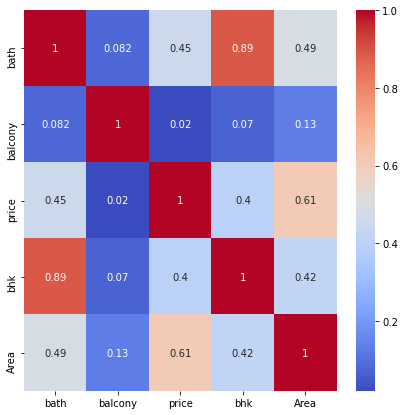

In [29]:
plt.figure(figsize=(7,7))
sns.heatmap(data.corr(),annot=True,cmap='coolwarm')

Text(0.5, 1.0, 'BARPLOT BETWEEN NUMBER OF BEDROOMS AND PRICES')

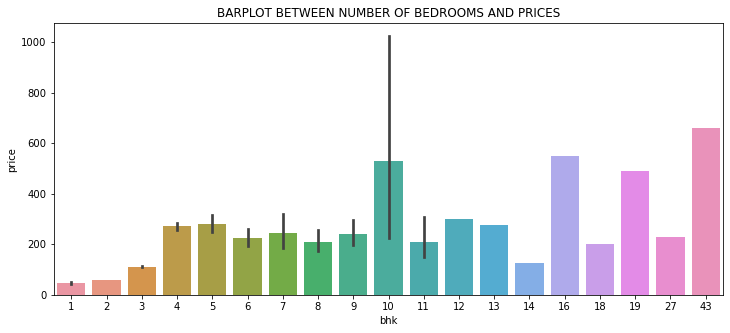

In [30]:
plt.figure(figsize=(12,5))
sns.barplot(x='bhk',y='price',data=data)
plt.title("BARPLOT BETWEEN NUMBER OF BEDROOMS AND PRICES")

Text(0.5, 1.0, ' COUNTPLOT OF NUMBER OF OF BEDROOMS')

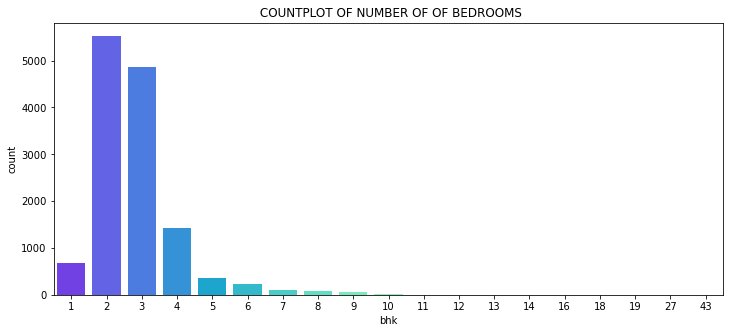

In [31]:
plt.figure(figsize=(12,5))
sns.countplot(data=data,x='bhk',palette='rainbow')
plt.title(" COUNTPLOT OF NUMBER OF OF BEDROOMS")

Text(0.5, 1.0, 'BARPLOT BETWEEN LOCATION AND PRICES')

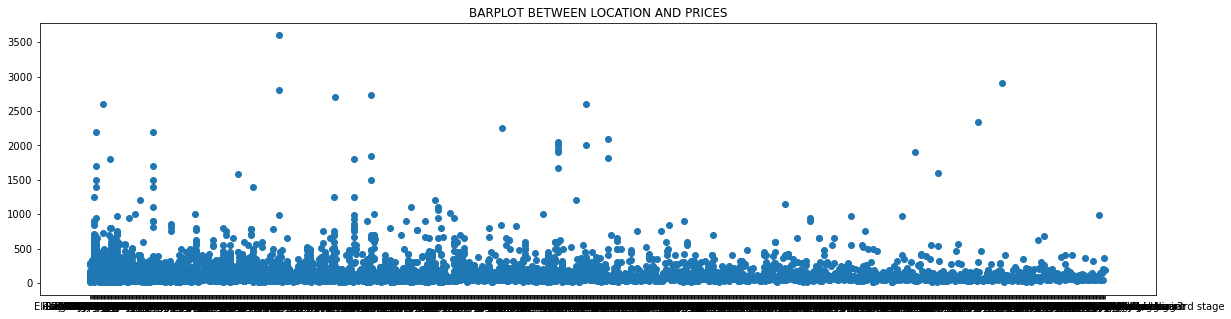

In [32]:
plt.figure(figsize=(20,5))
plt.scatter(x='location',y='price',data=data)
plt.title("BARPLOT BETWEEN LOCATION AND PRICES")

D:\ANACONDA\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'DISTRIBUTION OF PRICES')

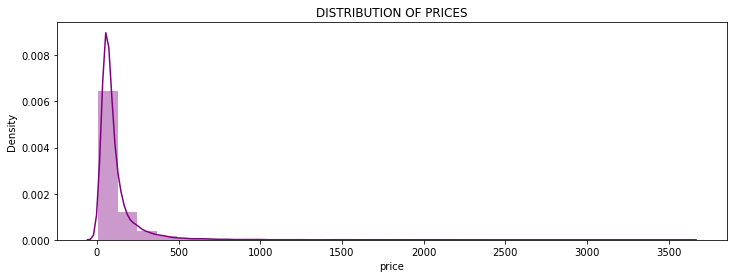

In [34]:
plt.figure(figsize=(12,4))
sns.distplot(data['price'],bins=30,color='purple')
plt.title("DISTRIBUTION OF PRICES")